In [1]:
!pip install -U vnstock

In [2]:
from vnstock import *

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [4]:
data = stock_historical_data(symbol="MSN", start_date="2021-05-25", end_date="2024-05-25", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
data

,time,open,high,low,close,volume,ticker
0,2021-05-26,93420,93420,91780,93090,1459300,MSN
1,2021-05-27,93090,93260,86620,90150,1642200,MSN
2,2021-05-28,90150,92190,89000,92190,2045800,MSN
3,2021-05-31,91780,91950,89740,90230,1011700,MSN
4,2021-06-01,90150,90150,85800,87680,2426200,MSN
...,...,...,...,...,...,...,...
745,2024-05-20,76500,77300,75700,76400,7869900,MSN
746,2024-05-21,76200,76500,74900,75800,5878600,MSN
747,2024-05-22,76000,76400,73800,73900,8354500,MSN
748,2024-05-23,73900,75800,73200,75800,6128100,MSN


In [5]:
pip install yfinance pandas numpy ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=20c7a01dcb53a596f330c07c4cd37035c5f31d52a92bd12d93c5322c52c74ac2
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [6]:
import ta

In [7]:
data1 = data.copy()
data1 = data1.set_index('time')
# Tính toán các chỉ báo kỹ thuật
data1['SMA_50'] = data1['close'].rolling(window=50).mean()  # Simple Moving Average (50 ngày)
data1['RSI'] = ta.momentum.RSIIndicator(data1['close'], window=14).rsi()  # Relative Strength Index (14 ngày)
macd = ta.trend.MACD(data1['close'])  # MACD
data1['MACD'] = macd.macd()
data1['MACD_Signal'] = macd.macd_signal()

# Xóa các hàng chứa giá trị NaN
data1.dropna(inplace=True)

# Hiển thị dữ liệu
data1

,open,high,low,close,volume,ticker,SMA_50,RSI,MACD,MACD_Signal
time,,,,,,,,,,
2021-08-03,112320,113980,111500,113810,1355500,MSN,93580.4,74.402926,4817.582168,3548.369744
2021-08-04,113810,113980,111660,112320,1587600,MSN,93965.0,70.621775,5022.205857,3843.136967
2021-08-05,111580,113070,110920,111500,1348900,MSN,94392.0,68.556883,5059.877341,4086.485042
2021-08-06,111580,112320,111090,111090,670500,MSN,94770.0,67.494258,4999.023064,4268.992646
2021-08-09,110680,116460,110680,116460,1525400,MSN,95294.6,73.325935,5322.752357,4479.744588
...,...,...,...,...,...,...,...,...,...,...
2024-05-20,76500,77300,75700,76400,7869900,MSN,73114.0,67.491042,820.429273,-41.156916
2024-05-21,76200,76500,74900,75800,5878600,MSN,73092.0,64.736127,1038.871057,174.848678
2024-05-22,76000,76400,73800,73900,8354500,MSN,72954.0,56.825796,1046.608967,349.200736


In [8]:
# Hàm xác định xu hướng
def determine_trend(row):
    if row['close'] > row['SMA_50'] and row['RSI'] > 50 and row['MACD'] > row['MACD_Signal']:
        return 'Uptrend'  # Xu hướng tăng
    elif row['close'] < row['SMA_50'] and row['RSI'] < 50 and row['MACD'] < row['MACD_Signal']:
        return 'Downtrend'  # Xu hướng giảm
    else:
        return 'Sideways'  # Đi ngang

# Áp dụng hàm để xác định xu hướng cho mỗi hàng dữ liệu
data1['Trend'] = data1.apply(determine_trend, axis=1)

data1

,open,high,low,close,volume,ticker,SMA_50,RSI,MACD,MACD_Signal,Trend
time,,,,,,,,,,,
2021-08-03,112320,113980,111500,113810,1355500,MSN,93580.4,74.402926,4817.582168,3548.369744,Uptrend
2021-08-04,113810,113980,111660,112320,1587600,MSN,93965.0,70.621775,5022.205857,3843.136967,Uptrend
2021-08-05,111580,113070,110920,111500,1348900,MSN,94392.0,68.556883,5059.877341,4086.485042,Uptrend
2021-08-06,111580,112320,111090,111090,670500,MSN,94770.0,67.494258,4999.023064,4268.992646,Uptrend
2021-08-09,110680,116460,110680,116460,1525400,MSN,95294.6,73.325935,5322.752357,4479.744588,Uptrend
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20,76500,77300,75700,76400,7869900,MSN,73114.0,67.491042,820.429273,-41.156916,Uptrend
2024-05-21,76200,76500,74900,75800,5878600,MSN,73092.0,64.736127,1038.871057,174.848678,Uptrend
2024-05-22,76000,76400,73800,73900,8354500,MSN,72954.0,56.825796,1046.608967,349.200736,Uptrend


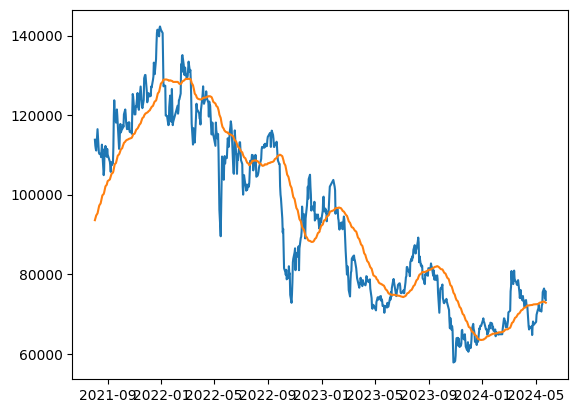

In [9]:
# Biểu đồ giá đóng cửa và SMA
plt.plot(data1.index, data1['close'], label='Close Price')
plt.plot(data1.index, data1['SMA_50'], label='SMA 50')

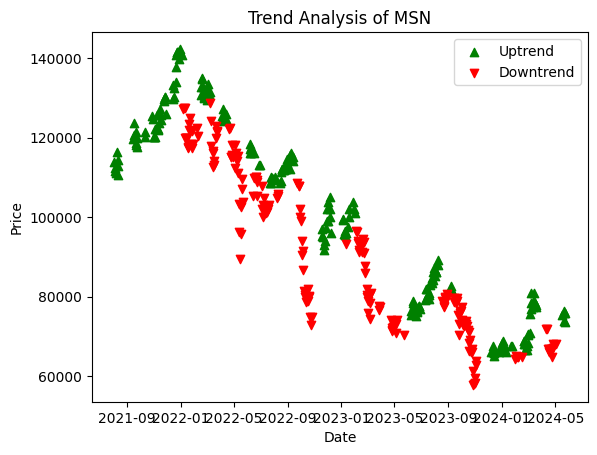

In [10]:
# Đánh dấu xu hướng
uptrend = data1[data1['Trend'] == 'Uptrend']
downtrend = data1[data1['Trend'] == 'Downtrend']

plt.scatter(uptrend.index, uptrend['close'], label='Uptrend', marker='^', color='g')
plt.scatter(downtrend.index, downtrend['close'], label='Downtrend', marker='v', color='r')

plt.title(f'Trend Analysis of MSN')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(data1) * 0.6)
test_size = int(len(data1) * 0.2)
train_data = data1[:train_size]
test_data = data1[train_size:train_size + test_size]
prediction_data = data1[train_size + test_size:]

# Xác định các đặc trưng và nhãn
features = ['SMA_50', 'RSI', 'MACD', 'MACD_Signal']
target = 'close'

In [18]:
# Walk-Forward Validation
def walk_forward_validation(train, test, features, target, prediction_data):
    predictions = []
    history = train.copy()

    for i in range(len(test)):
        model = LinearRegression()
        model.fit(history[features].dropna(), history[target].dropna())
        yhat = model.predict(test[features].iloc[i].values.reshape(1, -1))
        predictions.append(yhat[0])
        history = pd.concat([history, test.iloc[i]], ignore_index=True)

    future_predictions = []
    for i in range(len(prediction_data)):
      model = LinearRegression()
      model.fit(history[features].dropna(), history[target].dropna())
      yhat = model.predict([prediction_data[features].iloc[i]])
      future_predictions.append(yhat[0])
      new_row = prediction_data.iloc[i].copy()
      new_row['close'] = yhat[0]
      history = pd.concat([history, new_row], ignore_index=True)

    return predictions, future_predictions

# Dự đoán bằng Walk-Forward Validation
predictions, future_predictions = walk_forward_validation(train_data, test_data, features, target, prediction_data)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

[76979.90638002353,
 76058.6563443541,
 76845.62564412215,
 80380.05218554822,
 80054.08613936661,
 78483.84853959832,
 77288.50440133933,
 77633.47119849212,
 78244.47856231639,
 78661.73124015114,
 74235.78792062063,
 70644.71503554187,
 67599.25535437038,
 66857.78313151111,
 68116.9224723729,
 68346.93026630479,
 66085.63423034649,
 70664.48117532227,
 72756.73048284442,
 71997.97294349631,
 71304.12980154387,
 72176.18635931793,
 72831.17146407782,
 73329.80302310675,
 71044.76851836168,
 72184.90001820907,
 71500.14388845336,
 69111.78059464591,
 69324.94595793718,
 66253.39082622113,
 70242.03710970406,
 70535.87631755866,
 70335.99869379874,
 69323.2721686904,
 72574.29125456205,
 70707.56276488512,
 70173.93009005571,
 71579.82291480107,
 76184.37039736503,
 74969.75687224368,
 79114.4765709155,
 76561.56019063202,
 80541.10331216418,
 83538.80074298204,
 84384.47495558289,
 82693.63613499615,
 80855.50273905281,
 79932.21163679913,
 75730.24730281612,
 77161.29932014608,
 788

Mean Squared Error: 8924158.73813918


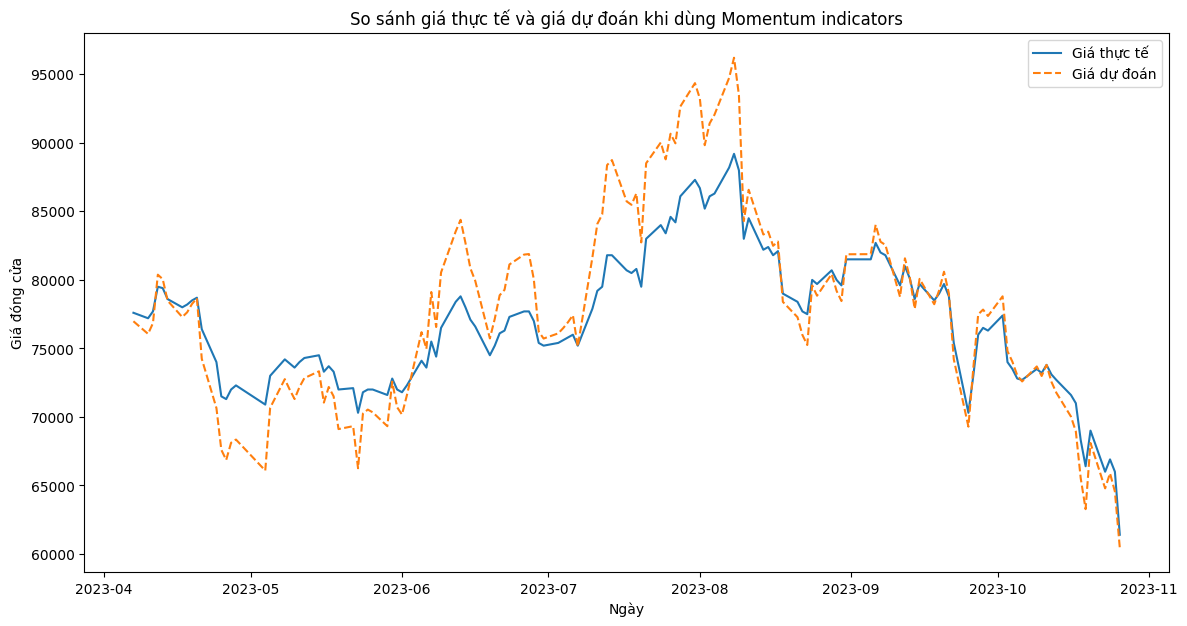

In [19]:
# Đánh giá mô hình
mse = mean_squared_error(test_data[target], predictions)
print(f'Mean Squared Error: {mse}')

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data[target], label='Giá thực tế')
plt.plot(test_data.index, predictions, label='Giá dự đoán', linestyle='--')
plt.title('So sánh giá thực tế và giá dự đoán khi dùng Momentum indicators')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.show()

<ipython-input-22-32e073dff180>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = predictions
<ipython-input-22-32e073dff180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_data['Predicted'] = future_predictions


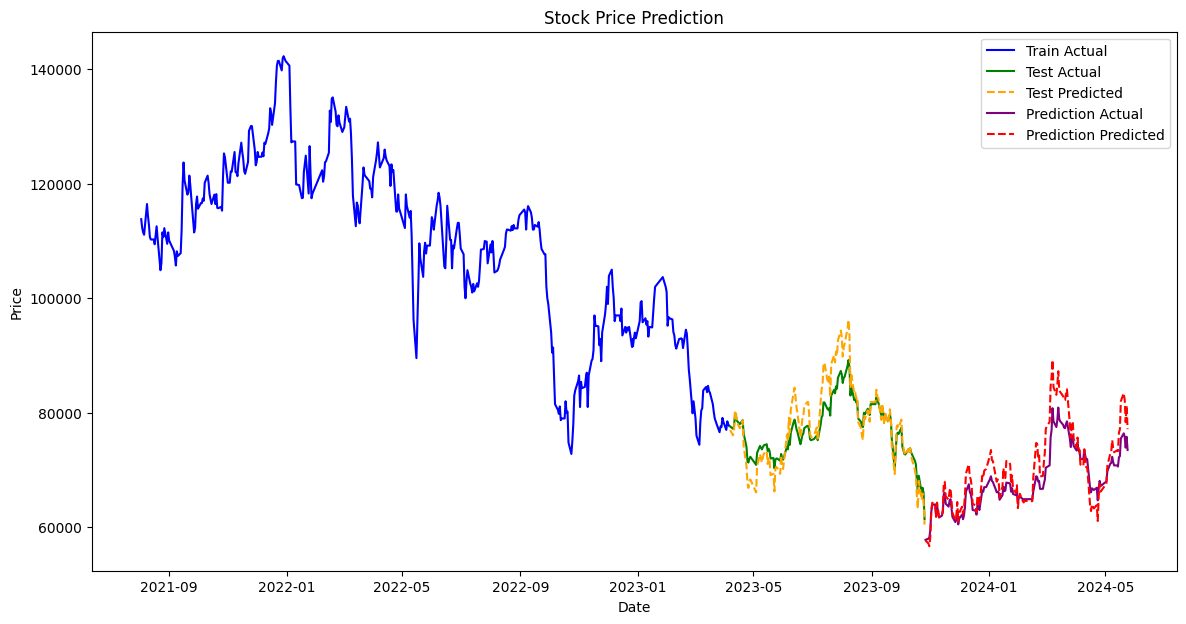

In [22]:
test_data['Predicted'] = predictions
prediction_data['Predicted'] = future_predictions
plt.figure(figsize=(14, 7))

plt.plot(train_data.index, train_data['close'], label='Train Actual', color='blue')
plt.plot(test_data.index, test_data['close'], label='Test Actual', color='green')
plt.plot(test_data.index, test_data['Predicted'], label='Test Predicted', linestyle='dashed', color='orange')
plt.plot(prediction_data.index, prediction_data['close'], label='Prediction Actual', color='purple')
plt.plot(prediction_data.index, prediction_data['Predicted'], label='Prediction Predicted', linestyle='dashed', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [20]:
# Tính toán các chỉ báo kỹ thuật
data2 = data.copy()
data2 = data2.set_index('time')
stoch = ta.momentum.StochasticOscillator(data2['high'], data2['low'], data2['close'], window=14)
data2['Stoch_%K'] = stoch.stoch()
data2['Stoch_%D'] = stoch.stoch_signal()

data2['Williams_%R'] = ta.momentum.WilliamsRIndicator(data2['high'], data2['low'], data2['close'], lbp=14).williams_r()
data2['StochRSI'] = ta.momentum.StochRSIIndicator(data2['close'], window=14).stochrsi()

data2.dropna(inplace=True)
data2

,open,high,low,close,volume,ticker,Stoch_%K,Stoch_%D,Williams_%R,StochRSI
time,,,,,,,,,,
2021-07-01,92040,94190,90960,93770,1706400,MSN,95.705521,87.612454,-4.294479,1.000000
2021-07-02,94190,94510,93520,94110,1294400,MSN,96.039604,93.435179,-3.960396,1.000000
2021-07-05,93190,93610,87580,92200,2219000,MSN,77.128713,89.624613,-22.871287,0.770469
2021-07-06,90880,92530,89230,90060,1564800,MSN,55.940594,76.369637,-44.059406,0.555637
2021-07-07,90060,95830,87650,95830,2469900,MSN,100.000000,77.689769,-0.000000,0.898874
...,...,...,...,...,...,...,...,...,...,...
2024-05-20,76500,77300,75700,76400,7869900,MSN,91.176471,89.931787,-8.823529,1.000000
2024-05-21,76200,76500,74900,75800,5878600,MSN,85.294118,90.456182,-14.705882,0.886630
2024-05-22,76000,76400,73800,73900,8354500,MSN,63.043478,79.838022,-36.956522,0.418741


In [25]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size2 = int(len(data2) * 0.6)
test_size2 = int(len(data2) * 0.2)
train_data2 = data2[:train_size2]
test_data2 = data2[train_size2:train_size2 + test_size2]
prediction_data2 = data2[train_size2 + test_size2:]

features2 = ['Stoch_%K', 'Stoch_%D', 'Williams_%R', 'StochRSI']
target2 = 'close'

predictions2, future_predictions2 = walk_forward_validation(train_data2, test_data2, features2, target2, prediction_data2)
predictions2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

[102927.47797530942,
 101436.49113490558,
 101191.90150821589,
 99621.95466939402,
 100159.58648170959,
 99298.83755968879,
 96569.6808010719,
 96527.5002208658,
 93323.27509472797,
 93328.57497986888,
 96334.41445838516,
 98189.87507864223,
 108544.27709569359,
 107307.94934649703,
 104190.77352418166,
 101819.3358764446,
 101949.0044445789,
 101957.60081641517,
 102207.5543149857,
 103574.37159585425,
 103760.74186196038,
 102235.72470276259,
 103392.61509140694,
 102510.8540563412,
 102276.3679500318,
 100740.65218145924,
 98421.2000887688,
 97647.23351415641,
 98112.0473056483,
 98133.75394883822,
 97705.70129337092,
 98471.77753450518,
 99502.6220210549,
 102001.50014768416,
 106921.26637765928,
 105991.80642484137,
 103068.25534007658,
 102582.97323223088,
 98417.99987317572,
 100772.34049516178,
 100574.74732820781,
 101093.18881200315,
 100877.31525675871,
 99700.67020363337,
 99512.72331650884,
 99499.97351405246,
 101713.74706949062,
 110352.24621325964,
 109889.33965920682,


Mean Squared Error: 8924158.73813918


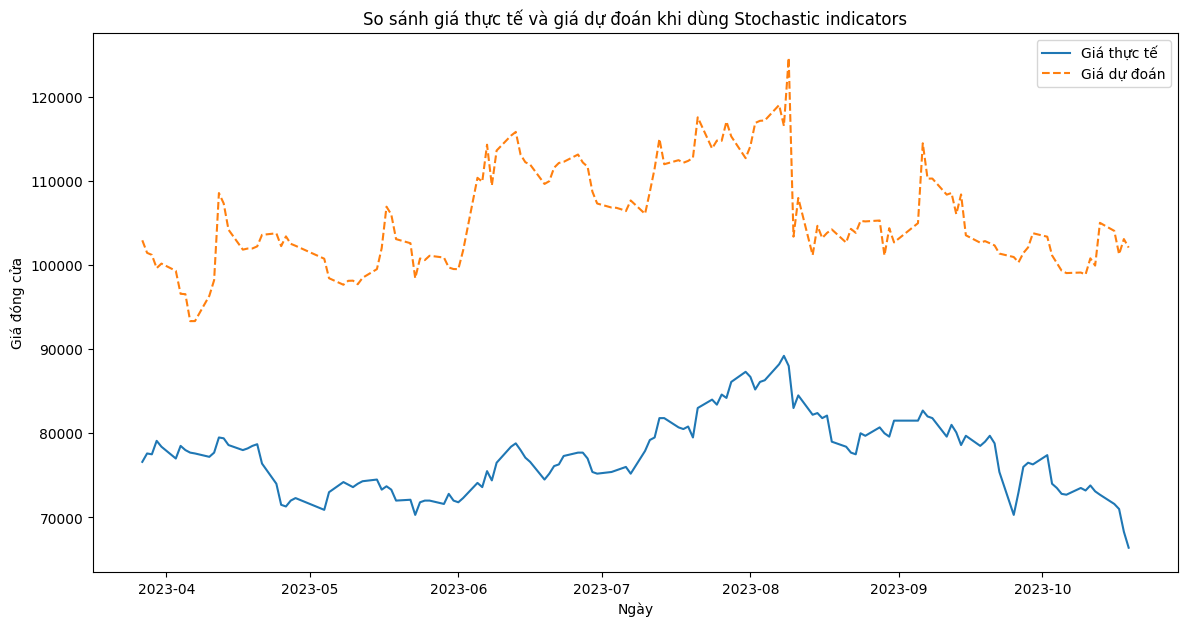

In [26]:
mse2 = mean_squared_error(test_data2[target], predictions2)
print(f'Mean Squared Error: {mse}')

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(14, 7))
plt.plot(test_data2.index, test_data2[target], label='Giá thực tế')
plt.plot(test_data2.index, predictions2, label='Giá dự đoán', linestyle='--')
plt.title('So sánh giá thực tế và giá dự đoán khi dùng Stochastic indicators')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.show()

<ipython-input-27-ebe8865914f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data2['Predicted'] = predictions2
<ipython-input-27-ebe8865914f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_data2['Predicted'] = future_predictions2


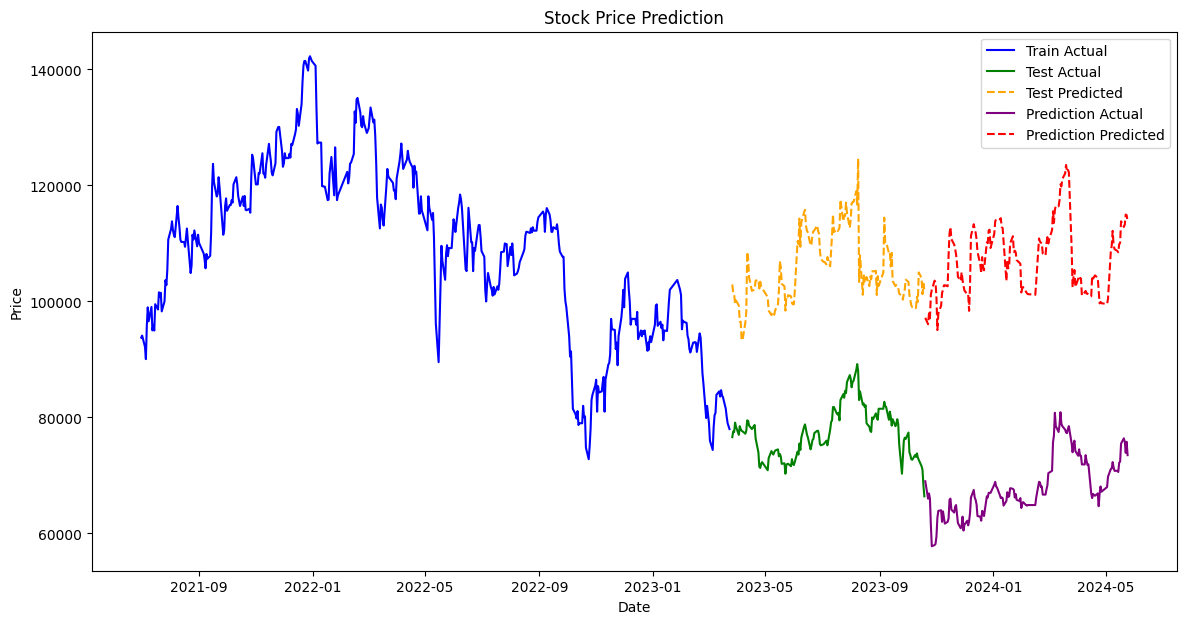

In [27]:
test_data2['Predicted'] = predictions2
prediction_data2['Predicted'] = future_predictions2
plt.figure(figsize=(14, 7))

plt.plot(train_data2.index, train_data2['close'], label='Train Actual', color='blue')
plt.plot(test_data2.index, test_data2['close'], label='Test Actual', color='green')
plt.plot(test_data2.index, test_data2['Predicted'], label='Test Predicted', linestyle='dashed', color='orange')
plt.plot(prediction_data2.index, prediction_data2['close'], label='Prediction Actual', color='purple')
plt.plot(prediction_data2.index, prediction_data2['Predicted'], label='Prediction Predicted', linestyle='dashed', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()